# Data Science Project
## Visualising HPG and AirREGI  data from Japanese Restaurants
### Fayz Siddiqui

This data was supplied by the University of Edinburgh. As part of a coursework, we were assigned to process and visualise data about Japanese restaurants from two different sources: 

- Hot Pepper Gourmet (HPG)
- AirREGI (Air)

Below are the visualisations produced for the project.

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib as mpl
import warnings 
warnings.filterwarnings('ignore')
np.random.seed(42)

print("All packages imported!")

plt.style.use('bmh')
sns.set_style(style="whitegrid")



All packages imported!


##----------------------------------------------------------------------Task 1----------------------------------------------------------------------##

In [2]:
hpg_reserve = pd.read_csv(os.path.join(os.getcwd(),'Data', 'hpg_reserve.csv.gz'))
air_reserve = pd.read_csv(os.path.join(os.getcwd(),'Data', 'air_reserve.csv'))
store_id = pd.read_csv(os.path.join(os.getcwd(),'Data','store_id_relation.csv'))

air_reserve_merged = pd.merge(air_reserve, store_id, on='air_store_id')
hpg_reserve_merged = pd.merge(hpg_reserve, store_id, on='hpg_store_id')

air_reserve_2016 = air_reserve_merged[air_reserve_merged["visit_datetime"].str.contains('2016-')]
air_visitors = air_reserve_2016["reserve_visitors"].sum()

hpg_reserve_2016 = hpg_reserve_merged[hpg_reserve_merged['visit_datetime'].str.contains('2016-')]
hpg_visitors = hpg_reserve_2016["reserve_visitors"].sum()

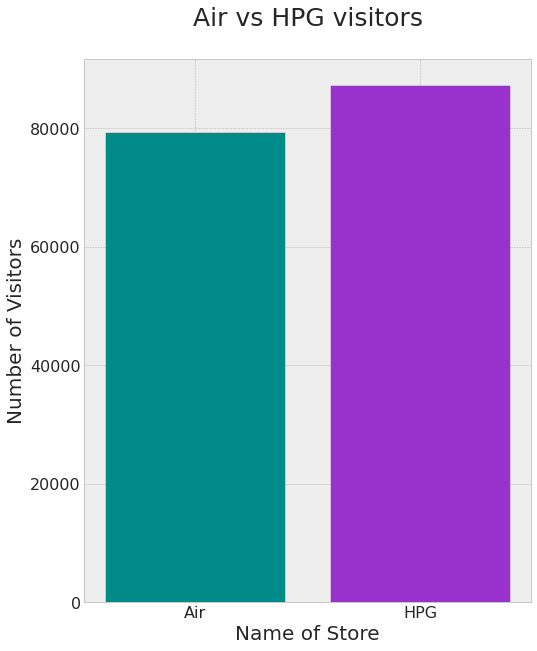

In [3]:
plt.style.use('bmh')
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,10))

x_axis = ["Air","HPG"]
height = [air_visitors, hpg_visitors]

axes.bar(x_axis, height, tick_label = x_axis, width = .8, color = ['darkcyan', 'darkorchid'], align = 'center') 
axes.set_title('Air vs HPG visitors', fontsize = 25,y = 1.05)
axes.set_xlabel("Name of Store", fontsize = 20)
axes.set_ylabel("Number of Visitors", fontsize = 20)
#axes.grid(color = "gold")

axes.tick_params(axis='x', labelsize = 16)
axes.tick_params(axis='y', labelsize = 16)

plt.show()


##----------------------------------------------------------------------Task 2----------------------------------------------------------------------##

In [4]:
air_store_data = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'air_store_info.csv'))
air_store_data

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
...,...,...,...,...,...
824,air_9bf595ef095572fb,International cuisine,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
825,air_764f71040a413d4d,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
826,air_10bbe8acd943d8f6,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
827,air_7514d90009613cd6,Karaoke/Party,Hokkaidō Sapporo-shi Minami 3 Jōnishi,43.055460,141.340956


In [5]:
air_store_data["air_genre_name"].unique()

array(['Italian/French', 'Dining bar', 'Yakiniku/Korean food',
       'Cafe/Sweets', 'Izakaya', 'Okonomiyaki/Monja/Teppanyaki',
       'Bar/Cocktail', 'Japanese food', 'Creative cuisine', 'Other',
       'Western food', 'International cuisine', 'Asian', 'Karaoke/Party'],
      dtype=object)

In [6]:
bars_and_cocktails = air_store_data[air_store_data['air_genre_name'] == "Bar/Cocktail"]
izakaya = air_store_data[air_store_data['air_genre_name'] == "Izakaya"]
dining_bars = air_store_data[air_store_data['air_genre_name'] == "Dining bar"]
karaoke_and_party = air_store_data[air_store_data['air_genre_name'] == "Karaoke/Party"]

italian_and_french = air_store_data[air_store_data['air_genre_name'] == "Italian/French"]
western = air_store_data[air_store_data['air_genre_name'] == "Western food"]

international_cuisine = air_store_data[air_store_data['air_genre_name'] == "International cuisine"]
creative_cuisine = air_store_data[air_store_data['air_genre_name'] == "Creative cuisine"]
other = air_store_data[air_store_data['air_genre_name'] == "Other"]

asian = air_store_data[air_store_data['air_genre_name'] == "Asian"]
omt = air_store_data[air_store_data['air_genre_name'] == 'Okonomiyaki/Monja/Teppanyaki']
japanese = air_store_data[air_store_data['air_genre_name'] == 'Japanese food']
korean = air_store_data[air_store_data['air_genre_name'] == 'Yakiniku/Korean food']

cafe_and_sweets = air_store_data[air_store_data['air_genre_name'] == 'Cafe/Sweets']


# print (len(bars_and_cocktails))
# print (len(izakaya))
# print (len(dining_bars))
# print (len(karaoke_and_party))

# print ("\n" + str(len(italian_and_french)))
# print (str(len(western)))


# print ("\n" + str(len(international_cuisine)))
# print (str(len(creative_cuisine)))
# print (str(len(other))), 

# print ("\n" + str(len(asian)))
# print (str(len(omt)))
# print (str(len(japanese)))
# print (str(len(korean)))

# print ("\n" + str(len(cafe_and_sweets)))

bars_and_party_array = ["Bar/Cocktail", "Izakaya", "Dining bar", "Karaoke/Party"]
international_array = ["Italian/French", "Western food", "International cuisine","Creative cuisine", "Other"]
asian_array = ["Asian", 'Okonomiyaki/Monja/Teppanyaki', 'Japanese food', 'Yakiniku/Korean food']


def replace_for_df(dataframe, column_name, array, new_value):
    new_dataframe = dataframe
    for old_value in array:
        new_dataframe = new_dataframe.replace(to_replace ={column_name: old_value} , value = {column_name: new_value})
    
    return new_dataframe

edited_air_store_data = replace_for_df(air_store_data, 'air_genre_name', bars_and_party_array, 'Bar/Party')
edited_air_store_data = replace_for_df(edited_air_store_data, 'air_genre_name', international_array, 'International')
edited_air_store_data = replace_for_df(edited_air_store_data, 'air_genre_name', asian_array, 'Asian')

edited_air_store_data["air_genre_name"].unique()

asian_stores = edited_air_store_data[edited_air_store_data['air_genre_name']=="Asian"]
international_stores = edited_air_store_data[edited_air_store_data['air_genre_name']=="International"]






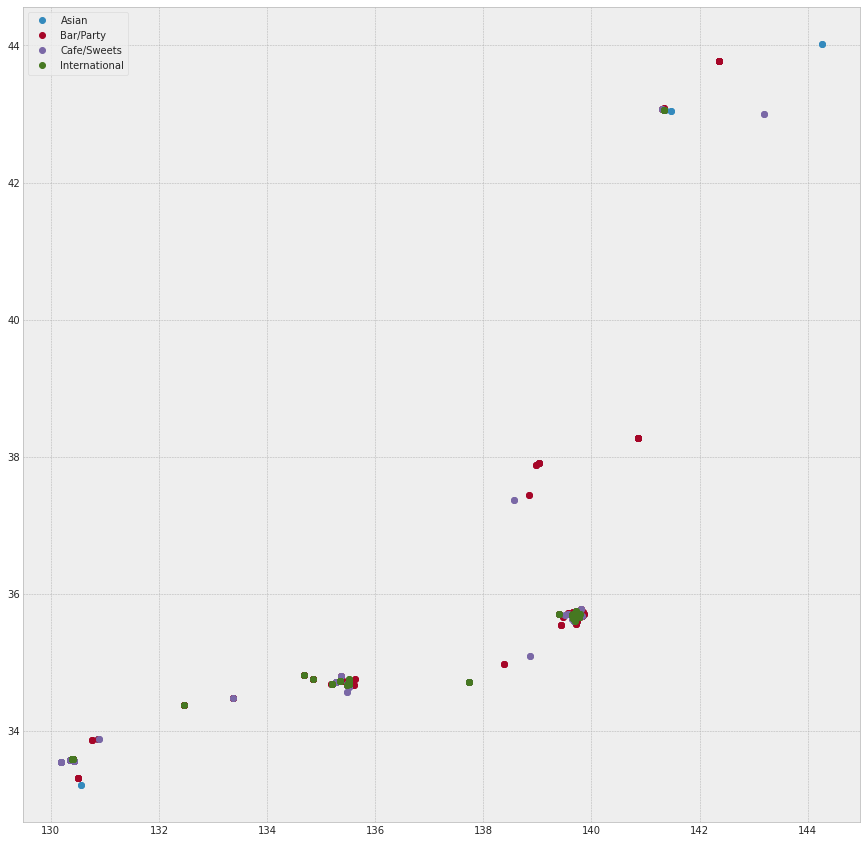

In [7]:
fig = plt.figure(figsize = (15,15))
axes = fig.add_subplot(1,1,1)



collapsed_air_store_data = edited_air_store_data.groupby("air_genre_name")
collapsed_air_store_data

for name, category in collapsed_air_store_data:
    axes.plot(category["longitude"], category["latitude"], marker="o", linestyle="", label= name)
    
plt.legend()


# fig = plt.figure(figsize = (8,8))
axes = fig.add_subplot(1,1,1)
# axes.scatter(x=asian_stores["longitude"], y=asian_stores["latitude"], s = 2, c = 'b')
# axes.scatter(x=international_stores["longitude"], y=international_stores["latitude"], s = 2, c = 'r')

# axes.set_title('Graph', fontsize = 25,y = 1.05)
# axes.set_xlabel("x-axis")
# axes.set_ylabel("Values after applying function")


In [8]:



# fig = plt.figure(figsize = (15,15))
# axes = fig.add_subplot(1,1,1)

# collapsed_air_store_data = edited_air_store_data.groupby("air_genre_name")
# collapsed_air_store_data

# noise_variance = 0.01       #Set the variance
# for category_name, category_data in collapsed_air_store_data:
    
#     latitude_array = category_data["latitude"].to_numpy()
#     longitude_array = category_data["longitude"].to_numpy()
#     latitude_noise = np.array([])
#     longitude_noise = np.array([])
#     print(longitude_array)

# #    latitude_noise = latitude_array + ((noise_variance) * np.random.randn(25))
#  #   longitude_noise = longitude_array + ((noise_variance) * np.random.randn(25))

#     for value in latitude_array:
#         noise = (noise_variance) * np.random.randn(25)
#         np.append(latitude_noise, (value + noise))
        
#     for value in longitude_array:
#         noise = (noise_variance) * np.random.randn(25)
#         np.append(longitude_noise, (value + noise))  
    
#     #print(longitude_array)
    
#     axes.plot(longitude_noise, latitude_noise, marker="o", linestyle="", label= category_name)
    
# plt.legend()


# # fig = plt.figure(figsize = (8,8))
# # axes = fig.add_subplot(1,1,1)
# # axes.scatter(x=asian_stores["longitude"], y=asian_stores["latitude"], s = 2, c = 'b')
# # axes.scatter(x=international_stores["longitude"], y=international_stores["latitude"], s = 2, c = 'r')

# # axes.set_title('Graph', fontsize = 25,y = 1.05)
# # axes.set_xlabel("x-axis")
# # axes.set_ylabel("Values after applying function")


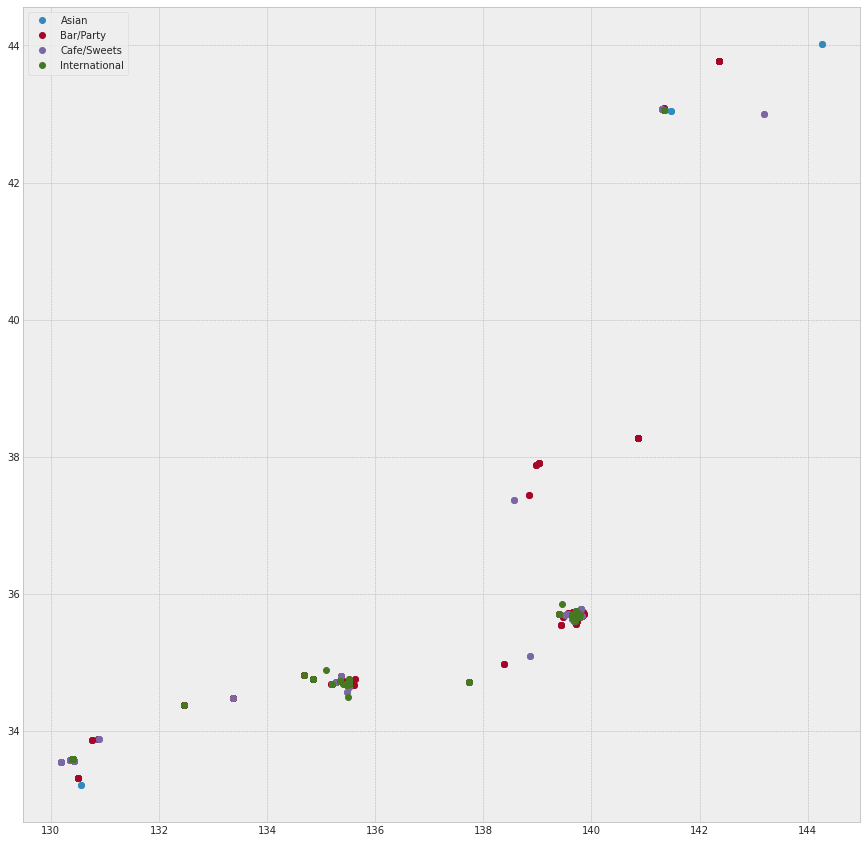

In [9]:
noisy_air_store_data = edited_air_store_data.copy()
noise_variance = 0.1 #Set the variance
for index in range(noisy_air_store_data.shape[1]):
    noisy_air_store_data['latitude'][index] = noisy_air_store_data['latitude'][index]  + ((noise_variance) * np.random.randint(-4,4))
    noisy_air_store_data['longitude'][index] = noisy_air_store_data['longitude'][index] + ((noise_variance) * np.random.randint(-4,4))
   # print ( noisy_air_store_data['longitude'])
   # print (noisy_air_store_data['longitude'])


fig = plt.figure(figsize = (15,15))
axes = fig.add_subplot(1,1,1)

collapsed_air_store_data = noisy_air_store_data.groupby("air_genre_name")
collapsed_air_store_data
       
for category_name, category_data in collapsed_air_store_data:
    
    axes.plot(category_data["longitude"], category_data["latitude"], marker="o", linestyle="", label= category_name)
    
plt.legend()


##----------------------------------------------------------------------Task 3----------------------------------------------------------------------##

In [10]:
air_visit_data = pd.read_csv(os.path.join(os.getcwd(),'Data', 'air_visit_data.csv'))
air_visit_data['visit_date'] = pd.to_datetime(air_visit_data['visit_date'])
air_visit_data

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6
...,...,...,...
252103,air_24e8414b9b07decb,2017-04-18,6
252104,air_24e8414b9b07decb,2017-04-19,6
252105,air_24e8414b9b07decb,2017-04-20,7
252106,air_24e8414b9b07decb,2017-04-21,8


In [11]:
edited_dataframe = air_visit_data.set_index('visit_date')
resampled_by_day = edited_dataframe.resample(rule='D',  origin = '2016-01-13')
mean_data_per_day = resampled_by_day.mean()
resampled_by_week = mean_data_per_day.resample(rule='W',  origin = '2016-01-13')
mean_data_per_week = resampled_by_week.sum()
mean_data_per_week

,visitors
visit_date,
2016-01-03,78.755401
2016-01-10,146.392259
2016-01-17,147.844029
2016-01-24,141.067746
2016-01-31,143.440527
...,...
2017-03-26,163.167792
2017-04-02,158.812067
2017-04-09,146.073419


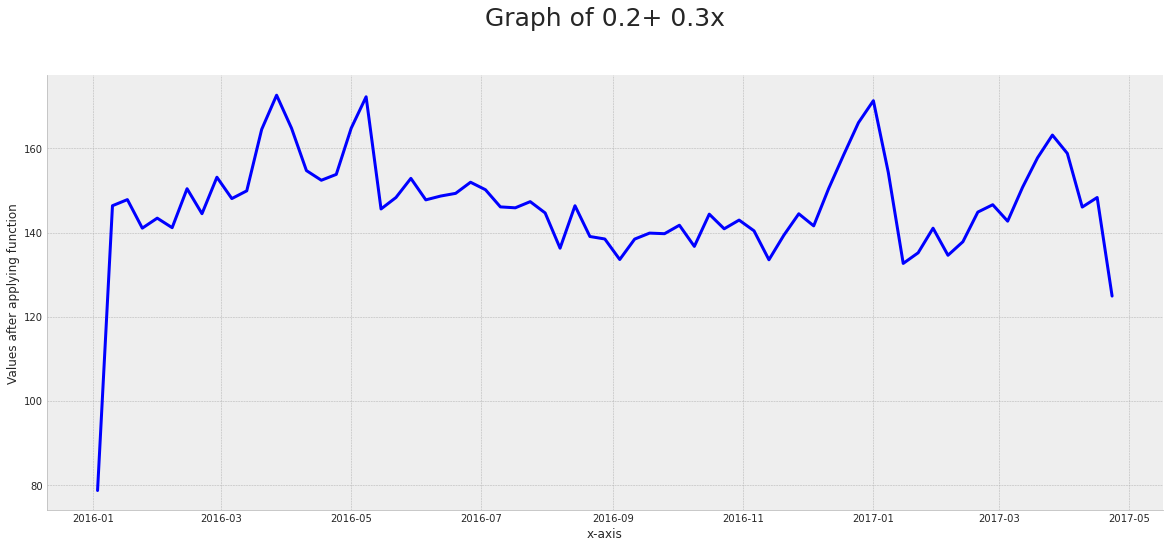

In [12]:
fig = plt.figure(figsize = (20,8))
axes = fig.add_subplot(1,1,1)

axes.plot(mean_data_per_week.index, mean_data_per_week['visitors'],'b-',label = 'Linear  Data', linewidth=3)
axes.set_title('Graph of 0.2+ 0.3x', fontsize = 25,y = 1.1)
axes.set_xlabel("x-axis")
axes.set_ylabel("Values after applying function")

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)


##----------------------------------------------------------------------Task 4----------------------------------------------------------------------##

In [13]:
hpg_reserve


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13
...,...,...,...,...
2000315,hpg_2b293477ea4642fb,2017-05-31 20:00:00,2017-04-19 07:00:00,2
2000316,hpg_f922aeca48ca5a29,2017-05-31 20:00:00,2017-03-19 00:00:00,3
2000317,hpg_e9151de687b93aa3,2017-05-31 21:00:00,2017-04-14 20:00:00,49
2000318,hpg_fae6c96189b4a122,2017-05-31 21:00:00,2017-04-19 17:00:00,9


In [14]:
hpg_reserve



,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13
...,...,...,...,...
2000315,hpg_2b293477ea4642fb,2017-05-31 20:00:00,2017-04-19 07:00:00,2
2000316,hpg_f922aeca48ca5a29,2017-05-31 20:00:00,2017-03-19 00:00:00,3
2000317,hpg_e9151de687b93aa3,2017-05-31 21:00:00,2017-04-14 20:00:00,49
2000318,hpg_fae6c96189b4a122,2017-05-31 21:00:00,2017-04-19 17:00:00,9


NameError: name 'visitors_each_day' is not defined

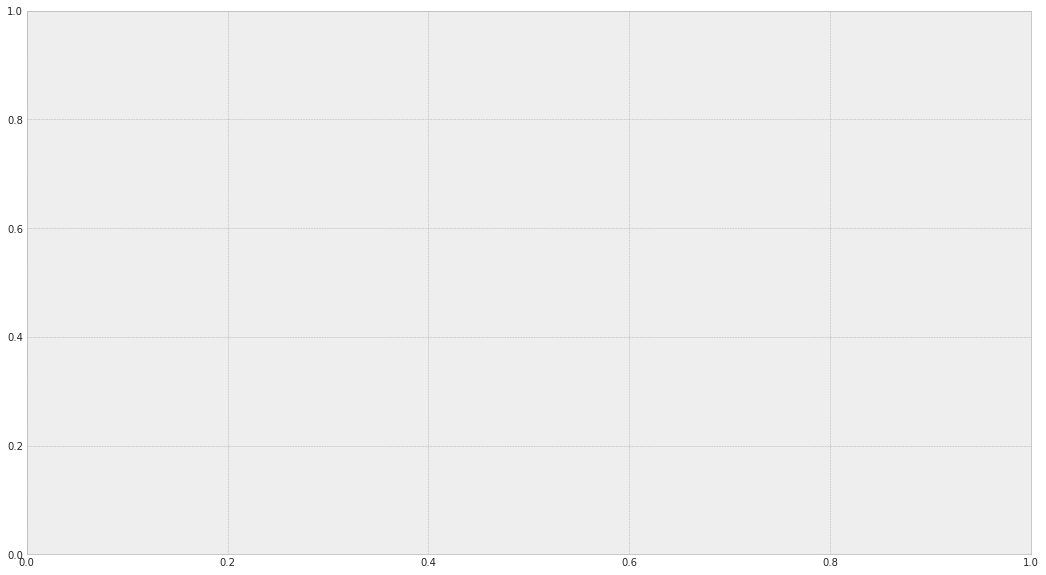

In [15]:

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (18,10))
#fig.suptitle("Air vs HPG visitors", size = 40, y = 1.15 )
height = visitors_each_day.array

x_axis = ["Monday","Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
#left = [2,4]
print(height)
axes.bar(x_axis, height, tick_label = x_axis, width = .8, color = ['darkcyan', 'darkorchid'], align = 'center') 
axes.set_title('Air vs HPG visitors', fontsize = 25,y = 1.05)
axes.set_xlabel("Day", fontsize = 20)
axes.set_ylabel("Number of Visitors (x10^6)", fontsize = 20)
#axes.grid(color = "gold")


#axes.spines['top'].set_visible(False)
#axes.spines['right'].set_visible(False)
#axes.spines['left'].set_color("gold")
#axes.spines['bottom'].set_color("gold")
axes.tick_params(axis='x', labelsize = 16)
axes.tick_params(axis='y', labelsize = 16)

#axes.tick_params(axis='y', colors='gold')



plt.show()

##----------------------------------------------------------------------Task ----------------------------------------------------------------------##

In [16]:
air_store_info = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'air_store_info.csv'))
air_reserve
air_store_info

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
...,...,...,...,...,...
824,air_9bf595ef095572fb,International cuisine,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
825,air_764f71040a413d4d,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
826,air_10bbe8acd943d8f6,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
827,air_7514d90009613cd6,Karaoke/Party,Hokkaidō Sapporo-shi Minami 3 Jōnishi,43.055460,141.340956


In [17]:
air_reserve['reserve_datetime'] = pd.to_datetime(air_reserve['reserve_datetime'])
air_reserve['visit_datetime'] = pd.to_datetime(air_reserve['visit_datetime'])
time_difference = air_reserve['visit_datetime'] - air_reserve['reserve_datetime']
air_reserve['time_difference'] = time_difference
air_reserve

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,time_difference
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,0 days 03:00:00
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,0 days 00:00:00
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,0 days 00:00:00
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,0 days 04:00:00
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,0 days 19:00:00
...,...,...,...,...,...
92373,air_db4b38ebe7a7ceff,2017-05-29 18:00:00,2017-04-17 19:00:00,6,41 days 23:00:00
92374,air_1033310359ceeac1,2017-05-30 23:00:00,2017-04-19 17:00:00,8,41 days 06:00:00
92375,air_877f79706adbfb06,2017-05-31 20:00:00,2017-04-12 23:00:00,3,48 days 21:00:00
92376,air_900d755ebd2f7bbd,2017-05-31 20:00:00,2017-04-19 16:00:00,10,42 days 04:00:00


In [18]:
air_info_merged = pd.merge(air_reserve, air_store_info, on='air_store_id')
air_info_merged

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,time_difference,air_genre_name,air_area_name,latitude,longitude
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,0 days 03:00:00,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,0 days 04:00:00,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
2,air_877f79706adbfb06,2016-01-02 18:00:00,2016-01-01 16:00:00,2,1 days 02:00:00,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
3,air_877f79706adbfb06,2016-01-02 21:00:00,2016-01-01 16:00:00,2,1 days 05:00:00,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
4,air_877f79706adbfb06,2016-01-08 21:00:00,2016-01-04 20:00:00,2,4 days 01:00:00,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
...,...,...,...,...,...,...,...,...,...
92373,air_b3a824511477a4ed,2017-05-16 19:00:00,2017-04-20 19:00:00,3,26 days 00:00:00,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
92374,air_b3a824511477a4ed,2017-05-21 18:00:00,2017-04-20 19:00:00,4,30 days 23:00:00,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
92375,air_b3a824511477a4ed,2017-05-21 19:00:00,2017-04-20 19:00:00,2,31 days 00:00:00,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
92376,air_cf2229e64408d9fe,2017-04-20 23:00:00,2017-04-20 10:00:00,2,0 days 13:00:00,Dining bar,Ōsaka-fu Ōsaka-shi Ōgimachi,34.705362,135.510025


In [19]:
air_info_merged['air_genre_name'].unique().tolist()
(air_info_merged['time_difference'][0].total_seconds())

10800.0

In [20]:
collapsed_air_store_data = air_info_merged.groupby("air_genre_name")
collapsed_air_store_data.dtypes



,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,time_difference,air_area_name,latitude,longitude
air_genre_name,,,,,,,,
Asian,object,datetime64[ns],datetime64[ns],int64,timedelta64[ns],object,float64,float64
Bar/Cocktail,object,datetime64[ns],datetime64[ns],int64,timedelta64[ns],object,float64,float64
Cafe/Sweets,object,datetime64[ns],datetime64[ns],int64,timedelta64[ns],object,float64,float64
Creative cuisine,object,datetime64[ns],datetime64[ns],int64,timedelta64[ns],object,float64,float64
Dining bar,object,datetime64[ns],datetime64[ns],int64,timedelta64[ns],object,float64,float64
International cuisine,object,datetime64[ns],datetime64[ns],int64,timedelta64[ns],object,float64,float64
Italian/French,object,datetime64[ns],datetime64[ns],int64,timedelta64[ns],object,float64,float64
Izakaya,object,datetime64[ns],datetime64[ns],int64,timedelta64[ns],object,float64,float64
Japanese food,object,datetime64[ns],datetime64[ns],int64,timedelta64[ns],object,float64,float64


In [21]:
#collapsed_air_store_data.boxplot(subplots = False, column = "time_difference")

for category_name, category_data in collapsed_air_store_data:
    axes.boxplot(x=category_data["time_difference"].array)
    
plt.show()

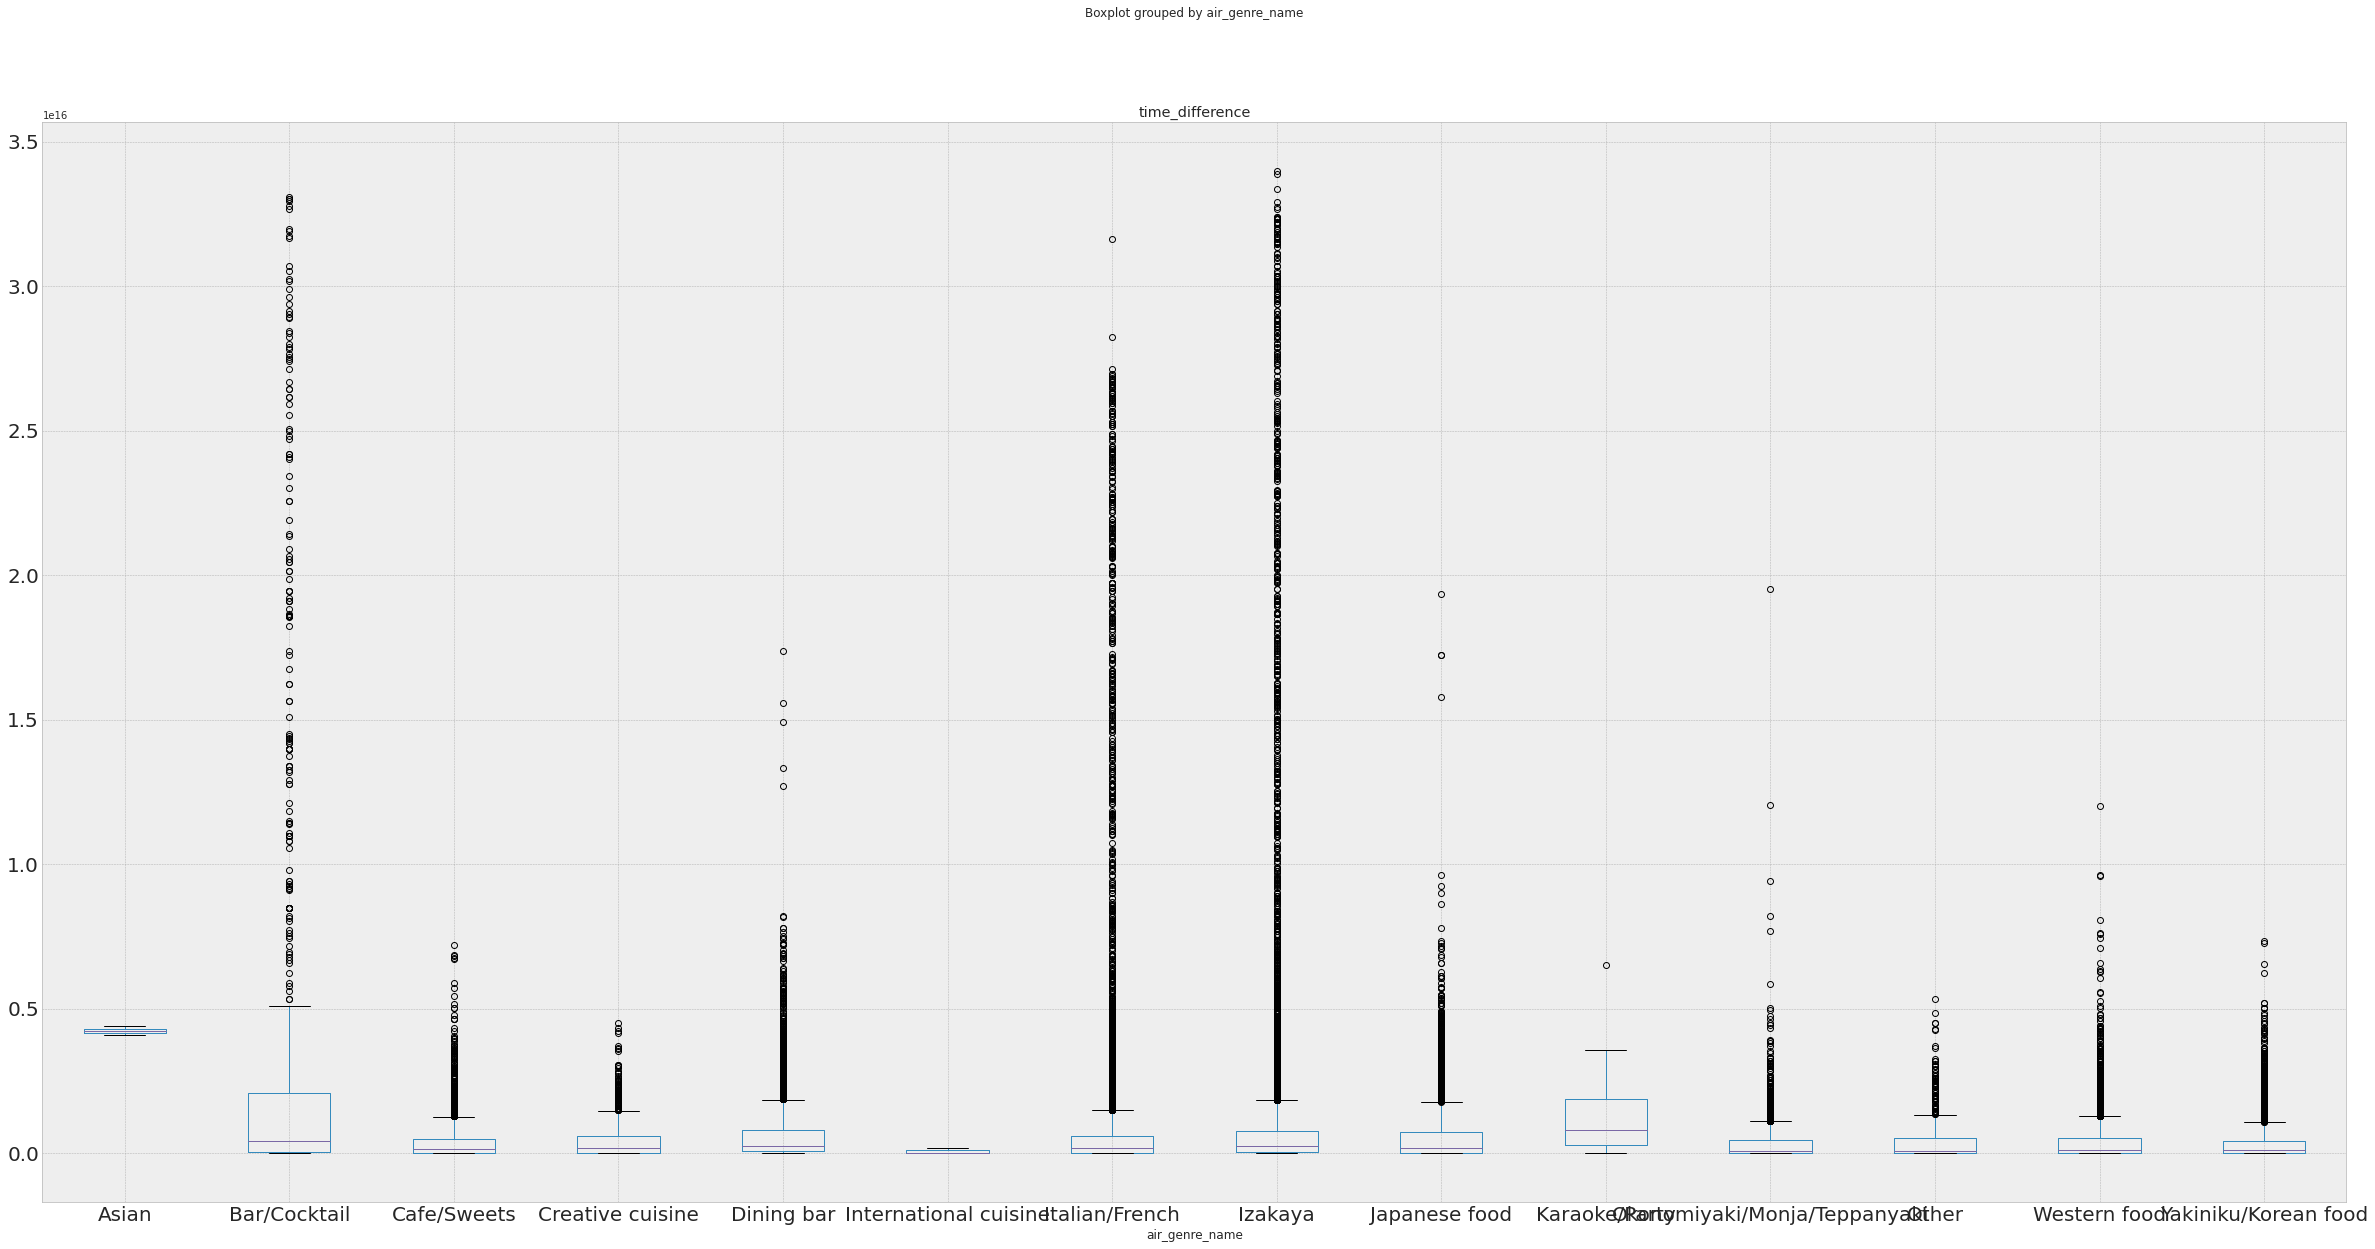

In [22]:
fig = plt.figure(figsize = (40,20))
axes = fig.add_subplot(1,1,1)

air_info_merged.boxplot(column = "time_difference", by = "air_genre_name", figsize = (30,20), ax = axes, fontsize = 20)

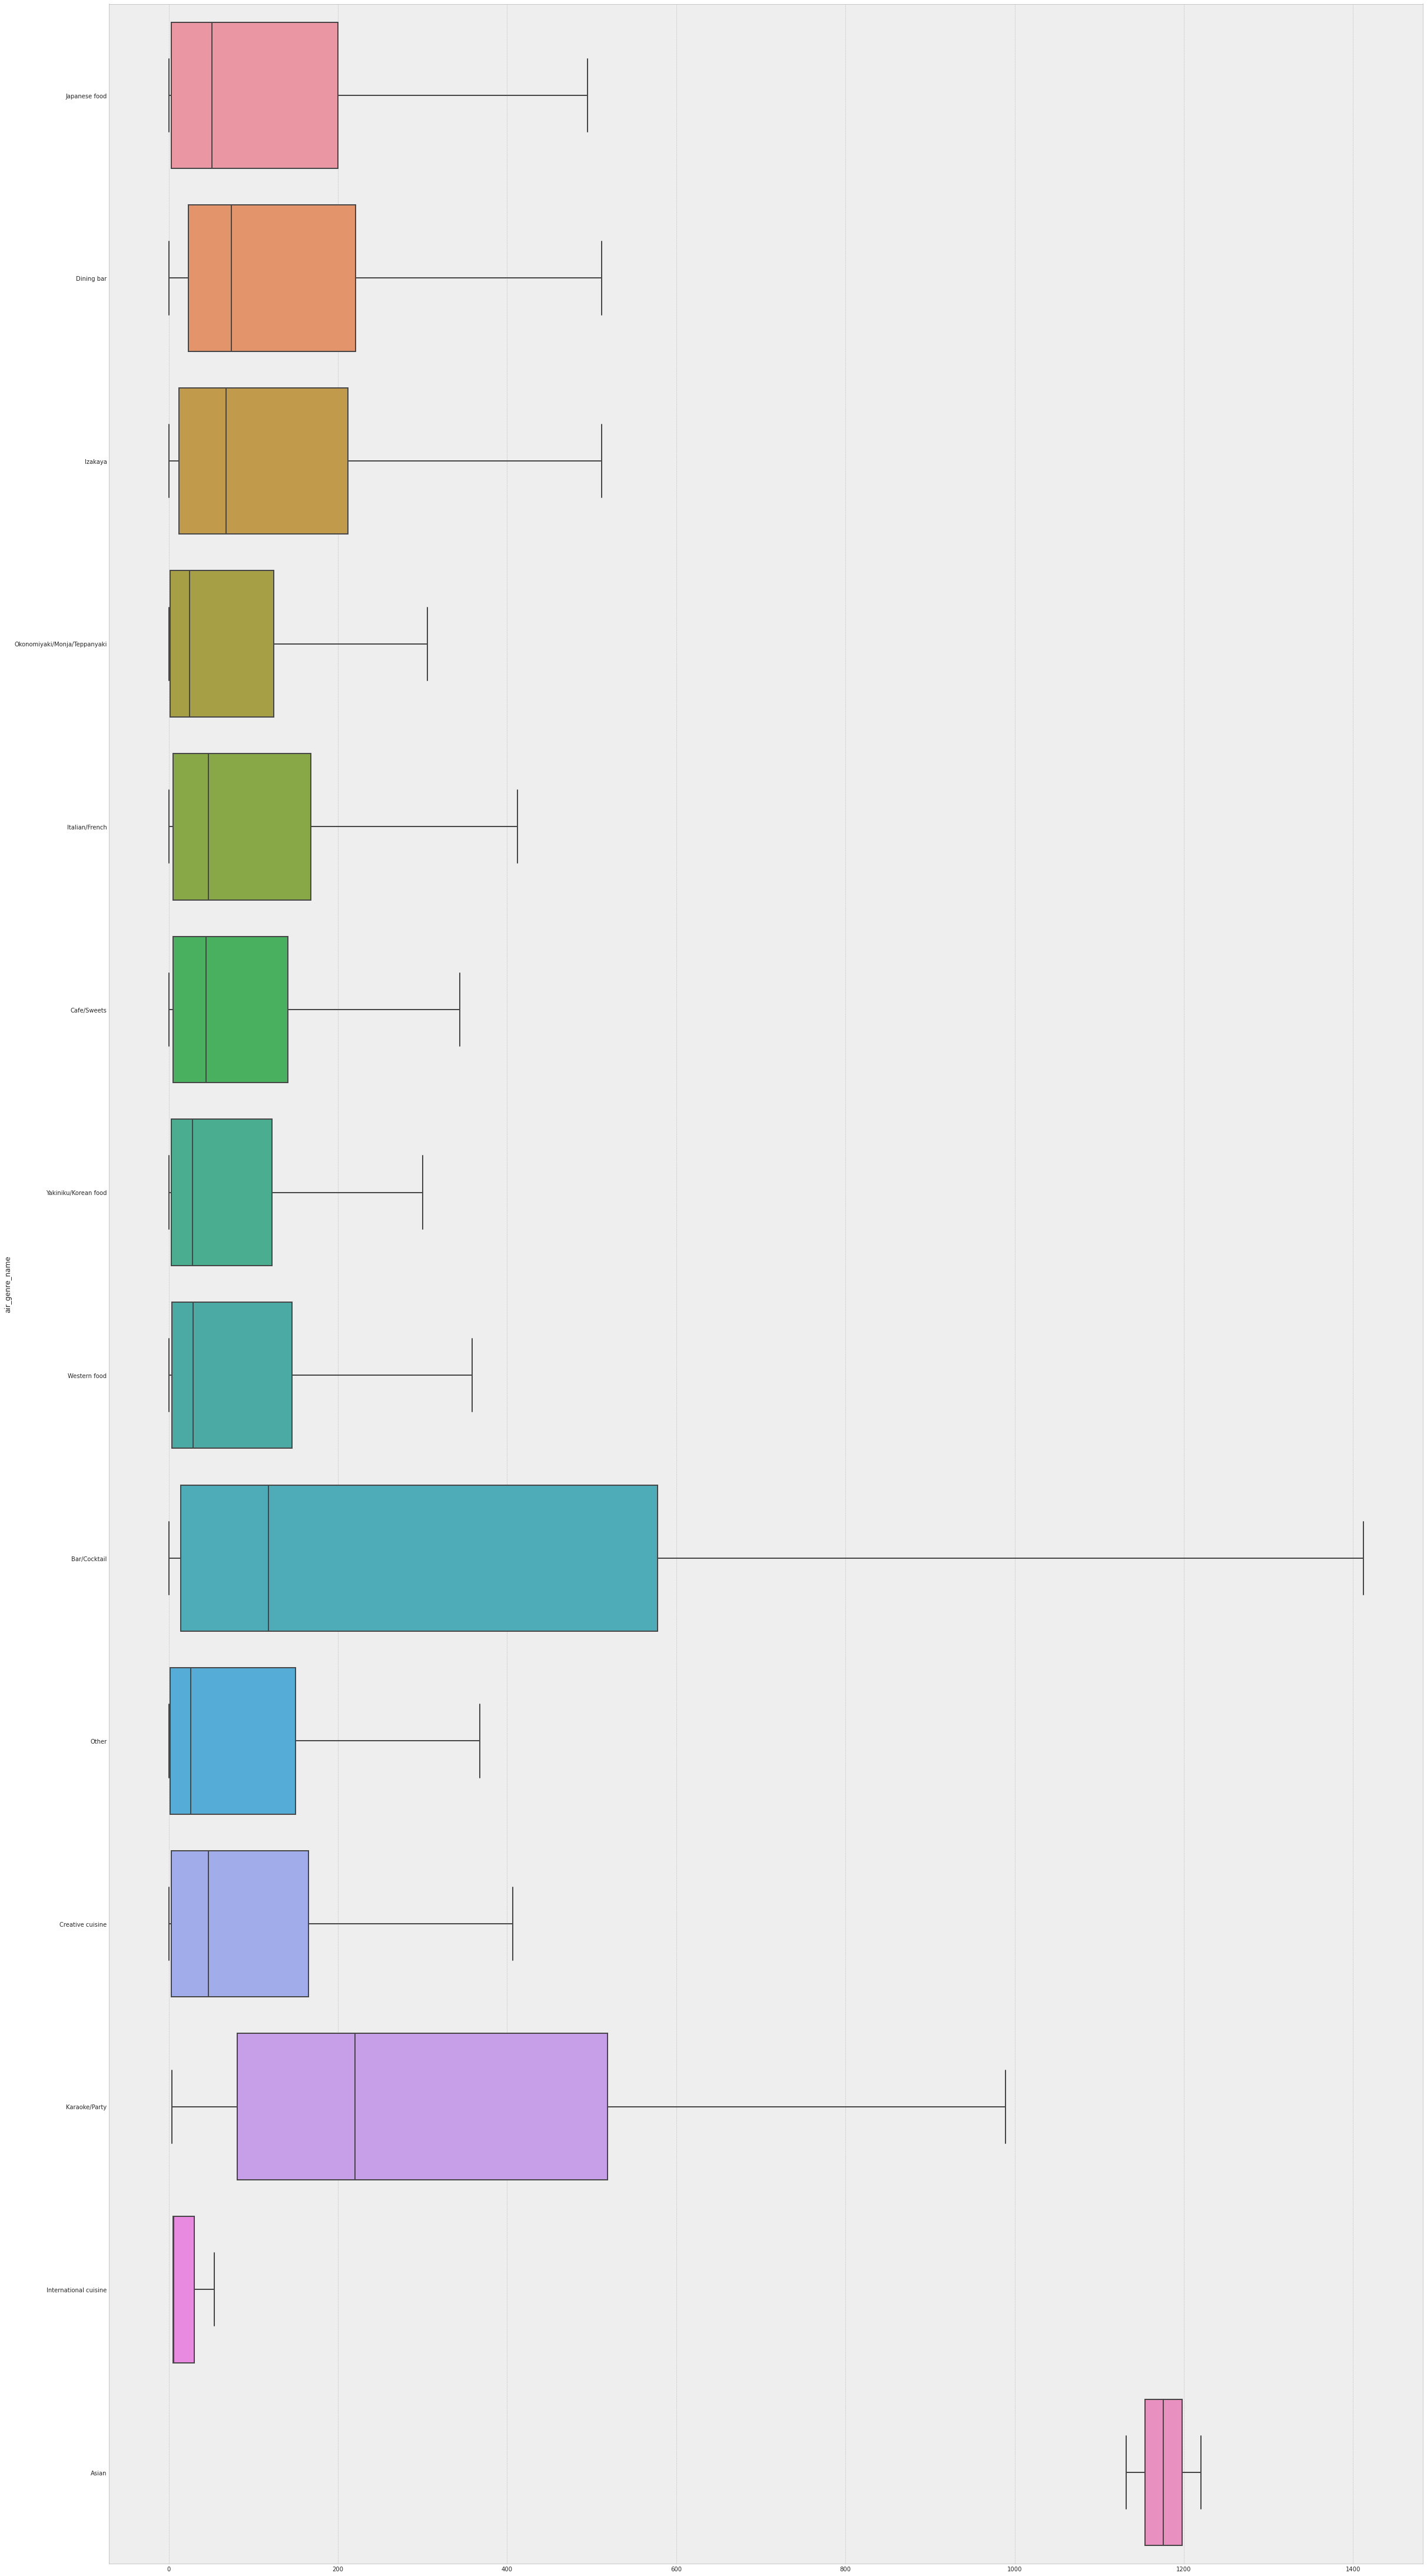

In [23]:
fig = plt.figure(figsize = (40,80))
sns.boxplot(x = (air_info_merged['time_difference'].array.total_seconds()/3600), y = "air_genre_name", data = air_info_merged,showfliers = False)
